# Example 0: Simple Photon Counts
Let's return to the example from earlier this week.

> Imagine a hypothetical simplistic example, where we point our telescope to observe the light from a single star with true flux $F_{\rm true}$, which remains constant with time. We will ignore any systematic errors. We perform $N$ measurements with our telescope, where the $i^{\rm th}$ measurement report an observed flux $F_i$ with uncertainty/error $e_i$.

Let's generate some toy data for this example: 

In [1]:
import numpy as np 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
np.random.seed(1)

In [4]:
F_true = 1000
N = 50 
F = np.random.poisson(lam=F_true, size=N)
e = np.sqrt(F)

Text(0, 0.5, 'measurement number')

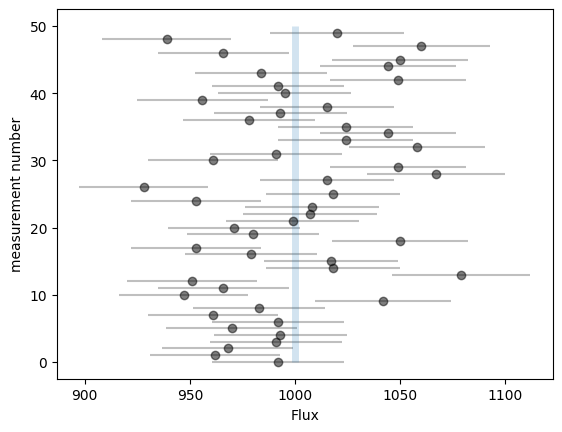

In [5]:
fig, ax = plt.subplots()
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.2)
ax.set_xlabel("Flux")
ax.set_ylabel("measurement number")

Now, given this set of independent measurements $\{F_i, e_i\}$, **what is our best estimate of $F_{\rm true}$**? 

## Frequentist Approach
Let's start with the frequentist approach. 

For a single observation $(F_i, e_i)$, we can write down the probability distrubtion, or likelihood, of the measurement given the true flux as[^1]
$$P(F_i, e_i\,|\,F_{\rm true}) = \frac{1}{\sqrt{2\pi e_i^2}}\,\exp \left(-\frac{(F_i - F_{\rm true})^2}{2e_i^2}\right).$$ 

Then, for all of our observations $\{(F_i, e_i)\}$, the probability distribution of the measurements given the true flux is
$$P(\{(F_i, e_i)\}\,|\,F_{\rm true}) = \prod\limits_{i=1}^{N} P(F_i, e_i\,|\,F_{\rm true}).$$
This is the "likelihood function". For practical purposes[^2], we often compute the log likelihood: 
$$\log P(\{(F_i, e_i)\}\,|\,F_{\rm true}) = \sum\limits_{i=1}^{N} \log P(F_i, e_i\,|\,F_{\rm true}) = -\frac{1}{2} \sum\limits_{i=1}^{N} \left[\log(2\pi e_i^2) + \frac{(F_i - F_{\rm true})^2}{e_i^2}\right].$$

[^1] Here we're making the reasonable assumption that the errors are Gaussian.
[^2] Likelihoods can be very small

---
Let's implement the frequentist approach

In [13]:
def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2) + (F - theta) ** 2 / e ** 2)

Text(0, 0.5, '$P(\\{(F_i, e_i)\\}\\,|\\,F_{\\rm true})$')

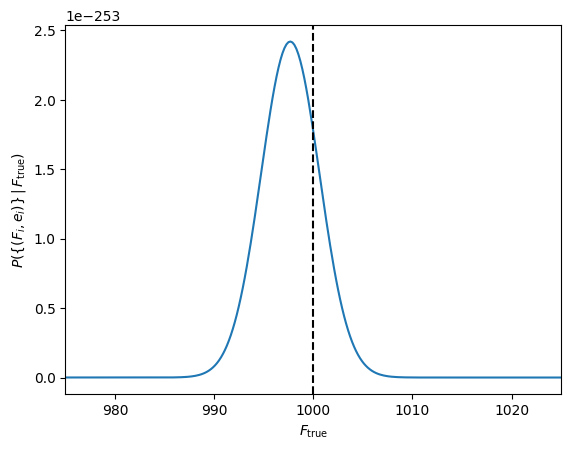

In [21]:
fig, ax = plt.subplots()
ax.plot(np.linspace(900, 1100, 1000), [10**log_likelihood(_F_true, F, e) for _F_true in np.linspace(900, 1100, 1000)])
ax.axvline(F_true, color='k', linestyle='--')
ax.set_xlabel(r"$F_{\rm true}$")
ax.set_xlim(975, 1025)
ax.set_ylabel(r"$P(\{(F_i, e_i)\}\,|\,F_{\rm true})$")

## Bayesian approach
Next, let's consider the Bayesian approach. We start by applying Bayes' Theorem to our example: 
$$P(F_{\rm true}\,|\,\{ F_i, e_i\} ) = \frac{P(\{ F_i, e_i\} \,|\,F_{\rm true})~P(F_{\rm true})}{P(\{ F_i, e_i\})}$$
 
- $P(\{ F_i, e_i\} \,|\,F_{\rm true})$ is the likelihood, same as in the Frequentist approach
  
- $P(F_{\rm true})$ is the prior
  
- $P(\{ F_i, e_i\})$ is the data probability or evidence. Note that this term does not depend on $F_{\rm true}$ so it can be considered a simple normalization term.

The main practical difference from the Frequentist approach is the prior. If we set the prior $P(F_{\rm true}) \propto 1$, a uniform "noninformative" prior

In [36]:
def log_prior0(theta): 
    # uniform "noninformative" prior 
    return 1

def log_posterior0(theta, F, e):
    return log_prior0(theta) + log_likelihood(theta, F, e)

Text(0, 0.5, '$P(\\{(F_i, e_i)\\}\\,|\\,F_{\\rm true})$')

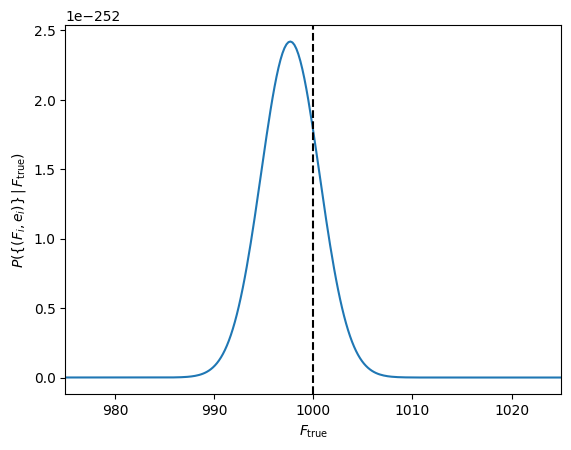

In [37]:
fig, ax = plt.subplots()
ax.plot(np.linspace(900, 1100, 1000), [10**log_posterior0(_F_true, F, e) for _F_true in np.linspace(900, 1100, 1000)])
ax.axvline(F_true, color='k', linestyle='--')
ax.set_xlabel(r"$F_{\rm true}$")
ax.set_xlim(975, 1025)
ax.set_ylabel(r"$P(\{(F_i, e_i)\}\,|\,F_{\rm true})$")

Then we get the exact same results as the Frequentist approach. This is why
> The Frequentist approach can often be viewed as simply a special case of the Bayesian approach for some (implicit) choice of the prior.

Let's consider a more interesting scenario where lets say we have the measurement:
$$\hat{F}_{\rm true} = 1002 \pm 4$$ 
This is from a different measurement strategy and we want to include this into the computation through the prior. This is often done in cosmological parameter estimation.

In this case we'd have an informative prior: 
$$P(F_{\rm true}) = \frac{1}{\sqrt{32\pi}}\,\exp \left(-\frac{(1002 - F_{\rm true})^2}{32}\right)$$

In [38]:
def log_prior1(theta): 
    # informative prior from different measurement strategy
    return -np.sqrt(32*np.pi) - (1002. - theta)**2/32

def log_posterior1(theta, F, e):
    return log_prior1(theta) + log_likelihood(theta, F, e)

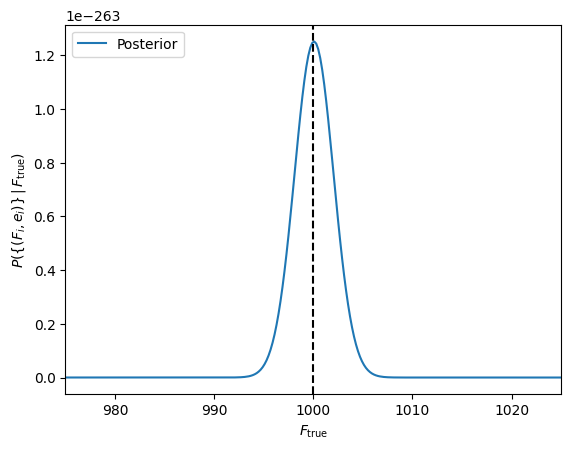

In [41]:
fig, ax = plt.subplots()
ax.plot(np.linspace(900, 1100, 1000), [10**log_posterior1(_F_true, F, e) for _F_true in np.linspace(900, 1100, 1000)], label='Posterior')
ax.axvline(F_true, color='k', linestyle='--')
ax.set_xlabel(r"$F_{\rm true}$")
ax.set_xlim(975, 1025)
ax.set_ylabel(r"$P(\{(F_i, e_i)\}\,|\,F_{\rm true})$")
ax.legend(loc='upper left')